# Logistic Regression

### Creating classifier

This classifier can only work with datasets with just 3 columns (2 features, 1 label). In this example, is used Sigmoid as activation function and Stocastic Gradient Descent to update the parameters

### Mathematical Background

To do logistic regression we use a Sigmoid function (or Softmax in case of multiclass classification) and pass as x paremeter our linear regression model. The sigmoid will squish the output of the model for each row between 0 and 1 giving us a probability that an observations belongs either to a class or another (eg. if the result is less than 0.5 the output is 0, otherwise the output is 1). This same logic can be applied in the case of multiclass classification using softmax as activation function.
![](https://miro.medium.com/max/700/1*_pQCVgz8mj_L-GL5iLyNZw.png)

![](https://miro.medium.com/max/700/1*VpnZOik8sn3JkE4gC_T7kA.png)

Stochastic gradient descent algorithm <br>
1) Initialize the coefficients with zero or small random values <br>
2) Evaluate the cost of these parameters by plugging them into a cost function <br>
3) Calculate the derivative of the cost function <br>
4) Update the parameters scaled by a learning rate/step size

Coefficient updates using gradient descent
![](https://cdn-images-1.medium.com/max/800/1*N6THdTd451D4C2RAhhqRCQ.png)
The derivative of the cost function is multiplied by the learning rate and added to the previous coefficient value to update it.
![](https://cdn-images-1.medium.com/max/800/1*Ecea3jVIRxK4Mkrh_Nie4w.jpeg)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Input:
# This function takes the beta parameters beta0, beta1, and beta2,
# as well as X1 and X2 as inputs
# Output:
# After having transformed the inputs into a real value between 0
# and 1, the function will return said value that can be interpreted
# as a probability

def sigmoid(beta0, beta1, beta2, X1, X2):
    linreg = beta0 + beta1*X1 + beta2*X2
    prediction = 1/(1 + np.exp(-linreg))
    return prediction

In [3]:
# This function takes the training instance as well as the betas
# and the previously calculated prediction to update the coefficients

def update_coefficients(beta0, beta1, beta2, X1, X2, Y, prediction, 
                        learn_rate, intercept_bias):
    beta0 = beta0 + learn_rate*(Y-prediction)*prediction*(1-prediction)*intercept_bias
    beta1 = beta1 + learn_rate*(Y-prediction)*prediction*(1-prediction)*X1
    beta2 = beta2 + learn_rate*(Y-prediction)*prediction*(1-prediction)*X2
    
    return beta0, beta1, beta2

In [4]:
# This function performs a stochastic gradient descent
# and returns the final coefficients
def sgd(df, epochs=1, learn_rate=0.3, intercept_bias= 1, cutoff=0.5):
    beta0 = 0.0
    beta1 = 0.0
    beta2 = 0.0

    for i in range(1,epochs+1):
        
        correct_predictions = 0
        print('\nThis is epoch number {}:\n'.format(i), '-'*60)
        
        for n in range(len(df.X1)):

            X1 = df.iloc[n,0]
            X2 = df.iloc[n,1]
            Y = df.iloc[n,2]

            prediction = sigmoid(beta0, beta1, beta2, X1, X2)

            beta0, beta1, beta2 = update_coefficients(beta0, beta1, beta2, X1, X2, Y, prediction, 
                                                      learn_rate, intercept_bias)
            
            if prediction < cutoff:
                class_ = 0
            else:
                class_ = 1
                
            if class_ == Y:
                correct_predictions+=1
            else:
                continue

            print('(Instance Number {}) Beta0: {:.3f}, Beta1: {:.3f}, Beta2: {:.3f}, \
                  prediction: {}, class: {}, actual class: {}'.format(n+1, beta0, beta1, beta2, prediction, class_, Y))
        
        accuracy = (correct_predictions/len(df.X1))*100
        print('\nAccuracy of this epoch: {}%\n'.format(accuracy), '-'*60)
    return beta0, beta1, beta2

### Creating test datasets

In [5]:
X1 = pd.Series(np.random.randn(50)+3)
X1 = pd.concat([X1, pd.Series(np.random.randn(50))]).reset_index(drop=True)
X2 = pd.Series(np.random.randn(50)+3)
X2 = pd.concat([X2, pd.Series(np.random.randn(50))]).reset_index(drop=True)

Y = pd.concat([pd.Series(np.random.choice(2, 50, p=[1, 0])), 
               pd.Series(np.random.choice(2, 50, 
                            p=[0, 1]))]).reset_index(drop=True)

df = pd.concat([X1, X2, Y], axis=1)
df.columns= ["X1", "X2", "Y"]
df.head()

,X1,X2,Y
0,2.124339,3.354362,0
1,3.142240,2.789901,0
2,1.568854,3.964331,0
3,2.239649,2.671979,0
4,3.504487,3.218155,0


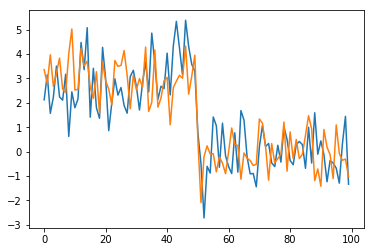

In [6]:
plt.plot(df.X1)
plt.plot(df.X2)

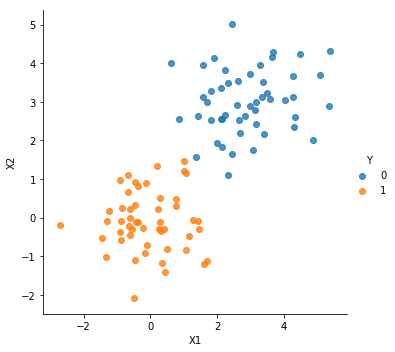

In [7]:
sns.lmplot(x="X1", y="X2", data=df, hue="Y", fit_reg=False)

In [8]:
X1 = pd.Series(np.random.randn(100))
X2 = pd.Series(np.random.randn(100))

Y = pd.concat([pd.Series(np.random.choice(2, 50, p=[1, 0])), 
               pd.Series(np.random.choice(2, 50, 
                            p=[0, 1]))]).reset_index(drop=True)

df2 = pd.concat([X1, X2, Y], axis=1)
df2.columns= ["X1", "X2", "Y"]
df2.head()

,X1,X2,Y
0,0.068190,-0.862448,0
1,-2.090626,1.609652,0
2,-2.160079,-1.647619,0
3,0.591226,2.508156,0
4,-0.654152,1.903414,0


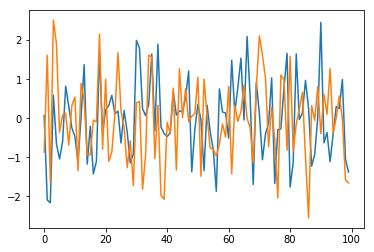

In [9]:
plt.plot(df2.X1)
plt.plot(df2.X2)

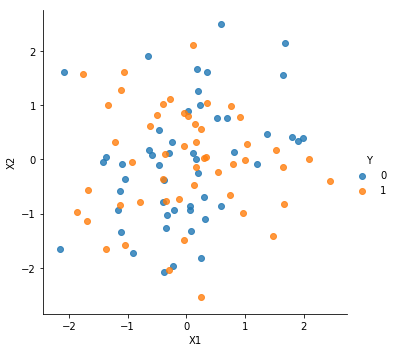

In [10]:
sns.lmplot(x="X1", y="X2", data=df2, hue="Y", fit_reg=False)

### Testing classifier

In [11]:
sgd(df,epochs=1, learn_rate=0.4,intercept_bias=3)


This is epoch number 1:
 ------------------------------------------------------------
(Instance Number 2) Beta0: -0.217, Beta1: -0.177, Beta2: -0.230,                   prediction: 0.27854786853632674, class: 0, actual class: 0
(Instance Number 3) Beta0: -0.254, Beta1: -0.196, Beta2: -0.279,                   prediction: 0.19675136201638996, class: 0, actual class: 0
(Instance Number 4) Beta0: -0.290, Beta1: -0.223, Beta2: -0.311,                   prediction: 0.19147524705360539, class: 0, actual class: 0
(Instance Number 5) Beta0: -0.303, Beta1: -0.238, Beta2: -0.325,                   prediction: 0.11187636223632101, class: 0, actual class: 0
(Instance Number 6) Beta0: -0.316, Beta1: -0.248, Beta2: -0.342,                   prediction: 0.11066860614246228, class: 0, actual class: 0
(Instance Number 7) Beta0: -0.340, Beta1: -0.265, Beta2: -0.362,                   prediction: 0.15244538288433773, class: 0, actual class: 0
(Instance Number 8) Beta0: -0.354, Beta1: -0.279, Beta2: -0.3

(2.1247172945900314, -0.24724956889392796, -0.4452031852531966)

In [12]:
sgd(df2,epochs=1, learn_rate=0.4,intercept_bias=3)


This is epoch number 1:
 ------------------------------------------------------------
(Instance Number 2) Beta0: -0.294, Beta1: 0.097, Beta2: -0.034,                   prediction: 0.48164325703597033, class: 0, actual class: 0
(Instance Number 3) Beta0: -0.406, Beta1: 0.177, Beta2: 0.027,                   prediction: 0.38992399954425366, class: 0, actual class: 0
(Instance Number 4) Beta0: -0.536, Beta1: 0.152, Beta2: -0.083,                   prediction: 0.44189075476084827, class: 0, actual class: 0
(Instance Number 5) Beta0: -0.617, Beta1: 0.169, Beta2: -0.133,                   prediction: 0.31162290538149917, class: 0, actual class: 0
(Instance Number 6) Beta0: -0.701, Beta1: 0.198, Beta2: -0.123,                   prediction: 0.3219226184040875, class: 0, actual class: 0
(Instance Number 7) Beta0: -0.778, Beta1: 0.213, Beta2: -0.126,                   prediction: 0.30399562157429466, class: 0, actual class: 0
(Instance Number 8) Beta0: -0.874, Beta1: 0.187, Beta2: -0.130,      

(1.915197908676623, 0.09927243477913865, -0.06341764093260661)